<a href="https://colab.research.google.com/github/KAILASHVenkat/DMS-Project/blob/main/Adjacency_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

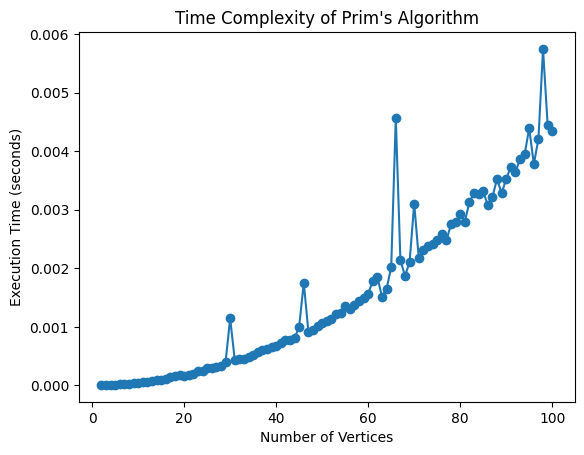

In [7]:
import sys
import time
import matplotlib.pyplot as plt

class Prim:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)]

    def add_edge(self, u, v, weight):
        self.graph[u][v] = weight
        self.graph[v][u] = weight

    def min_key(self, key, mst_set):
        min_val = sys.maxsize
        min_index = -1

        for v in range(self.V):
            if key[v] < min_val and not mst_set[v]:
                min_val = key[v]
                min_index = v

        return min_index

    def prim(self):
        start_time = time.time()  # Measure the start time

        key = [sys.maxsize] * self.V
        parent = [-1] * self.V
        mst_set = [False] * self.V

        key[0] = 0  # Start with the first node

        for _ in range(self.V - 1):
            u = self.min_key(key, mst_set)
            mst_set[u] = True

            for v in range(self.V):
                if self.graph[u][v] > 0 and not mst_set[v] and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u

        end_time = time.time()  # Measure the end time
        execution_time = end_time - start_time

        #self.print_mst(parent)

        return execution_time

    #def print_mst(self, parent):
     #   print("Edge \tWeight")
      #  for i in range(1, self.V):
       #     print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

# Visualize time complexity
def visualize_time_complexity(max_vertices):
    vertices_range = list(range(2, max_vertices + 1))
    execution_times = []

    for v in vertices_range:
        g = Prim(v)
        # Adding edges with random weights for illustration
        for i in range(v):
            for j in range(i + 1, v):
                g.add_edge(i, j, 1)

        execution_time = g.prim()
        execution_times.append(execution_time)

    plt.plot(vertices_range, execution_times, marker='o')
    plt.xlabel('Number of Vertices')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Time Complexity of Prim\'s Algorithm')
    plt.show()

# Example usage:
visualize_time_complexity(100)
